# Title: Cloud Instances Recommender for NB w RFC CI Class Application


# Load Library  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import math
from statistics import mean 
import statistics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle

%matplotlib inline

# Read dataset 

In [4]:
# dataset 
df = pd.read_csv("dataset_compute.csv")
# Lulesh verification dataset 
df_veri = pd.read_csv("dataset_compute_LULESH_runtime.csv")

df


,Rating,Cost(per hour USD),Cloud Instances
0,4.000000,0.0928,t2.large
1,2.000000,0.0832,B2ms
2,3.666667,0.0950,N1s2
3,3.333333,0.0150,Lin.G
4,2.666667,0.1000,c4.large
...,...,...,...
175,3.000000,0.0230,t2.small
176,4.000000,0.0752,t3a.large
177,3.000000,0.0376,t3a.medium
178,1.333333,0.0188,t3a.small


In [5]:
# Shuffel dataset 

df = shuffle(df)

df=df.append(df_veri)

# Data Visualization

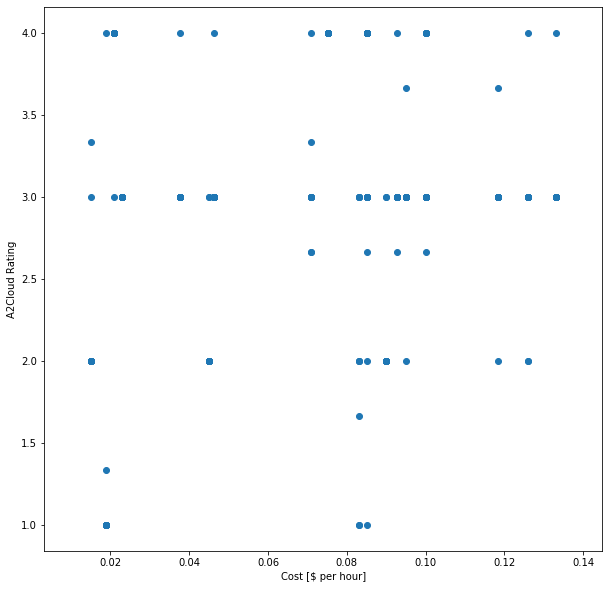

In [6]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df.iloc[:,1:2],df.iloc[:,0:1],  marker='o')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Rating')
plt.show()

In [7]:
# K-Means

In [8]:
X=df.iloc[:,0:2]
model = KMeans(n_clusters = 4)
kmeans=model.fit(X)
labels = kmeans.labels_ # creating classification columns for supervised learning 
labels

array([0, 3, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2,
       0, 3, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 0, 3, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 1, 3, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 1, 1,
       0, 1, 0, 0, 2, 0, 1, 2, 0, 3, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 3, 1,
       1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 3, 2, 2, 0, 0, 0, 3,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 0], dtype=int32)

In [9]:
df['cluster']=labels
df

,Rating,Cost(per hour USD),Cloud Instances,cluster
140,3.0,0.0928,t2.large,0
98,1.0,0.0188,t3a.small,3
137,3.0,0.0376,t3a.medium,0
167,3.0,0.0450,Lin.C,0
36,4.0,0.0752,t3a.large,2
...,...,...,...,...
15,3.0,0.0230,t2.small,0
16,4.0,0.0752,t3a.large,2
17,4.0,0.0376,t3a.medium,2
18,4.0,0.0188,t3a.small,2


# Cluster Visualization

Text(0, 0.5, 'A2Cloud Score')

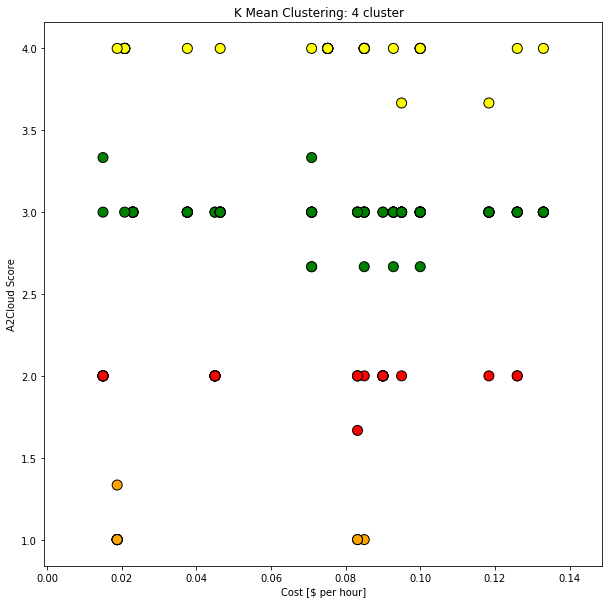

In [10]:
fig = plt.figure(figsize=(10, 10))
 # Create a colormap
colormap = np.array(['green', 'red','yellow','orange'])
plt.scatter(df.iloc[:,1:2], df.iloc[:,0:1], c=colormap[model.labels_], edgecolor = 'black', s = 100)
plt.title('K Mean Clustering: 4 cluster  ')
plt.xlabel('Cost [$ per hour]')
plt.ylabel('A2Cloud Score')

### Cluster Number conversion: 4-excellent, 3-good, 2-avg, 1- bad

In [13]:
df.head(20)

,Rating,Cost(per hour USD),Cloud Instances,cluster
140,3.000000,0.0928,t2.large,0
98,1.000000,0.0188,t3a.small,3
137,3.000000,0.0376,t3a.medium,0
167,3.000000,0.0450,Lin.C,0
36,4.000000,0.0752,t3a.large,2
10,3.666667,0.1184,N1M2,2
116,4.000000,0.0752,t3a.large,2
142,2.000000,0.0950,N1s2,1
70,3.000000,0.1184,N1M2,0
176,4.000000,0.0752,t3a.large,2


In [14]:
#dataset save as csv file
df.to_csv(r'dataset_new.csv',index=False)
df_new = pd.read_csv("dataset_new.csv")
df1=df_new

# check cluster label and set manually to each run
df_new=df_new.replace({'cluster':0},7)
df_new=df_new.replace({'cluster':1},6)
df_new=df_new.replace({'cluster':2},8)
df_new=df_new.replace({'cluster':3},5)

df_new=df_new.replace({'cluster':5},1)
df_new=df_new.replace({'cluster':6},2)
df_new=df_new.replace({'cluster':7},3)
df_new=df_new.replace({'cluster':8},4)

In [15]:
df=df_new

# Training

In [16]:
xtrain=df[['Rating','Cost(per hour USD)']]
xtrain=xtrain[0:144]
ytrain=df['cluster'].values.tolist()
ytrain=ytrain[0:144]

In [17]:
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# Testing 

In [18]:
xtest=df[['Rating','Cost(per hour USD)']]
xt=df[['Rating','Cost(per hour USD)']]
xtest=xtest[144:180]
b=df['cluster'].values.tolist()
y_actual=b[144:180]


In [19]:
y_pred = classifier.predict(xtest)

print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 100.0 %


In [20]:
print(confusion_matrix(y_pred, y_actual))


[[ 3  0  0  0]
 [ 0  9  0  0]
 [ 0  0 17  0]
 [ 0  0  0  7]]


# Plot confusion matrix

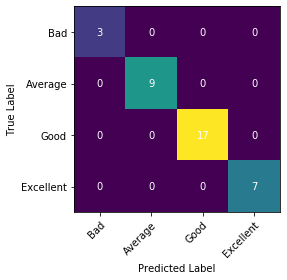

In [22]:
a_label = ["Bad","Average","Good","Excellent"]
p_label = ["Bad","Average","Good","Excellent"]

cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

fig.tight_layout()
plt.show()

# LULESH 30 verification

In [23]:
x_qode=df_veri[['Rating','Cost(per hour USD)']]

y_pred = classifier.predict(x_qode)


In [24]:
y_actual=b[180:200]

y_actual
print(confusion_matrix(y_pred, y_actual))


[[ 0  1  0  0]
 [ 0  3  0  0]
 [ 0  0 11  0]
 [ 0  0  0  5]]


In [25]:
print('Model Accuracy is',100*accuracy_score(y_pred,y_actual),'%')


Model Accuracy is 95.0 %


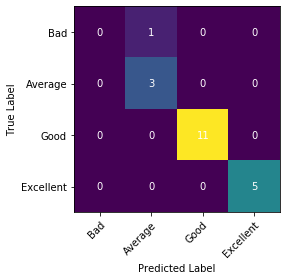

In [26]:
a_label = ["Bad","Average","Good","Excellent"]
p_label = ["Bad","Average","Good","Excellent"]
cm=confusion_matrix(y_pred, y_actual)

fig, ax = plt.subplots()
im = ax.imshow(cm)

# We want to show all ticks...
ax.set_xticks(np.arange(len(a_label)))
ax.set_yticks(np.arange(len(p_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(a_label)
ax.set_yticklabels(a_label)
ax.set_ylim(len(cm)-0.5, -0.5)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(a_label)):
    for j in range(len(p_label)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")
ax.set_xlabel("Predicted Label")        
ax.set_ylabel("True Label")        

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

### Get Instance Suggestion for New application: Input=[A2Cloud_score, cost_per_hour]

In [29]:
# Input from user 

rating = float(input(' Rating (1 to 4): '))
cost = float(input('Cost of instance (per hour): '))

# prediction function implementation
def Prediction(rating,cost):
    y_pred = classifier.predict((np.array([rating,cost])).reshape(1, -1))[0]
    return y_pred
    
# prediction function call 
guess_cluster=Prediction(rating,cost) 

#slice dataset based on the predicited cluster 
training=df[0:144]
training=training[training['cluster']==guess_cluster]

 Rating (1 to 4): 3
Cost of instance (per hour): .1


### Mulitple Instance Recommendation

In [32]:
# calculate unique instances name in the predicted cluster 
instance=training['Cloud Instances'].unique()
print("The Recommended Instances are: ",instance)

The Recommended Instances are:  ['t2.large' 't3a.medium' 'Lin.C' 'N1M2' 'Lin.M' 'N1cc' 'B2ms' 'N1s2'
 'm4.large' 't2.medium' 'Lin.G' 'F2s' 't2.small' 'c4.large' 'r4.large'
 'E2s']


### Single Instance Recommendation

In [35]:
instance_single=training.sort_values(by=['Rating', 'Cost(per hour USD)'])

instance_single=instance_single.iloc[0:1,:]
print("Instance recommendation for your App: ",instance_single.iloc[0,2:3][0] )

Instance recommendation for your App:  N1cc
